<a href="https://colab.research.google.com/github/boroju/aidl-upc-winter2024-satellite-imagery/blob/main/notebooks/jose/dixie_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install odc-stac
!pip install planetary_computer
!pip install rioxarray
!pip install 'stackstac[viz]'

In [ ]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [
              -121.25131576911181,
              40.969973000588965
            ],
            [
              -121.25131576911181,
              40.90835057362685
            ],
            [
              -121.08341212531607,
              40.90835057362685
            ],
            [
              -121.08341212531607,
              40.969973000588965
            ],
            [
              -121.25131576911181,
              40.969973000588965
            ]
        ]
    ],
}

In [ ]:
bbox_of_interest = [33.984, 0.788, 34.902, 1.533]



In [ ]:
# 2021 Dixie Wildfire in California
latitude = 40.7310
longitude = -122.9420
location = [longitude, latitude]
# area_of_interest or geometry
area_of_interest = {
    "type": "Point",
    "coordinates": location,
}
buffer = 0.7
bbox = [longitude - buffer, latitude - buffer, longitude + buffer, latitude + buffer]

In [ ]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

search = catalog.search(
    collections=["esa-worldcover"],
    bbox=bbox,
)

items = list(search.get_items())
items

/usr/local/lib/python3.10/dist-packages/pystac_client/item_search.py:835: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


[<Item id=ESA_WorldCover_10m_2021_v200_N39W126>,
 <Item id=ESA_WorldCover_10m_2021_v200_N39W123>,
 <Item id=ESA_WorldCover_10m_2020_v100_N39W126>,
 <Item id=ESA_WorldCover_10m_2020_v100_N39W123>]

In [ ]:
import pandas as pd
import geopandas

search.item_collection()

df = geopandas.GeoDataFrame.from_features(search.item_collection().to_dict(), crs="epsg:4326")
df.head().T


0  \
geometry                        POLYGON ((-124.6344167 42, -124.6165 41.958166...   
created                                               2023-04-06T16:07:46.379172Z   
mission                                                    sentinel-1, sentinel-2   
datetime                                                                     None   
platform                        sentinel-1a, sentinel-1b, sentinel-2a, sentine...   
grid:code                                                   ESAWORLDCOVER-N39W126   
proj:epsg                                                                    4326   
description                              ESA WorldCover product at 10m resolution   
instruments                                                          [c-sar, msi]   
end_datetime                                                 2021-12-31T23:59:59Z   
start_datetime                                               2021-01-01T00:00:00Z   
esa_worldcover:product_tile                                               N39W126   
esa_worldcover:product_version                                              2.0.0   

                                                                                1  \
geometry                        POLYGON ((-123 42, -123 39, -120 39, -120 42, ...   
created                                               2023-04-06T16:07:29.765180Z   
mission                                                    sentinel-1, sentinel-2   
datetime                                                                     None   
platform                        sentinel-1a, sentinel-1b, sentinel-2a, sentine...   
grid:code                                                   ESAWORLDCOVER-N39W123   
proj:epsg                                                                    4326   
description                              ESA WorldCover product at 10m resolution   
instruments                                                          [c-sar, msi]   
end_datetime                                                 2021-12-31T23:59:59Z   
start_datetime                                               2021-01-01T00:00:00Z   
esa_worldcover:product_tile                                               N39W123   
esa_worldcover:product_version                                              2.0.0   

                                                                                2  \
geometry                        POLYGON ((-124.6344167 42, -124.6165 41.958166...   
created                                               2023-04-06T15:32:47.450769Z   
mission                                                    sentinel-1, sentinel-2   
datetime                                                                     None   
platform                        sentinel-1a, sentinel-1b, sentinel-2a, sentine...   
grid:code                                                   ESAWORLDCOVER-N39W126   
proj:epsg                                                                    4326   
description                              ESA WorldCover product at 10m resolution   
instruments                                                          [c-sar, msi]   
end_datetime                                                 2020-12-31T23:59:59Z   
start_datetime                                               2020-01-01T00:00:00Z   
esa_worldcover:product_tile                                               N39W126   
esa_worldcover:product_version                                              1.0.0   

                                                                                3  
geometry                        POLYGON ((-123 42, -123 39, -120 39, -120 42, ...  
created                                               2023-04-06T15:32:31.234736Z  
mission                                                    sentinel-1, sentinel-2  
datetime                                                                     None  
platform                        sentinel-1a, sentinel-1b, sentinel-2a, sentine...  
gri

In [ ]:
import rich.table

# Assets
t_assets = rich.table.Table("Key", "Value")
for key, asset in items[0].assets.items():
    t_assets.add_row(key, asset.title)
t_assets

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key              ┃ Value                             ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ map              │ Land Cover Classes                │
│ input_quality    │ Classification Input Data Quality │
│ tilejson         │ TileJSON with default rendering   │
│ rendered_preview │ Rendered preview                  │
└──────────────────┴───────────────────────────────────┘

In [ ]:
# Metadata
t_metadata = rich.table.Table("Key", "Value")
for k, v in sorted(items[0].properties.items()):
    t_metadata.add_row(k, str(v))
t_metadata

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Key                            ┃ Value                                              ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ created                        │ 2023-04-06T16:07:46.379172Z                        │
│ datetime                       │ None                                               │
│ description                    │ ESA WorldCover product at 10m resolution           │
│ end_datetime                   │ 2021-12-31T23:59:59Z                               │
│ esa_worldcover:product_tile    │ N39W126                                            │
│ esa_worldcover:product_version │ 2.0.0                                              │
│ grid:code                      │ ESAWORLDCOVER-N39W126                              │
│ instruments                    │ ['c-sar', 'msi']                                   │
│ mission                        │ sentinel-1, sentinel-2                             │
│ platform                       │ sentinel-1a, sentinel-1b, sentinel-2a, sentinel-2b │
│ proj:epsg                      │ 4326                                               │
│ start_datetime                 │ 2021-01-01T00:00:00Z                               │
└────────────────────────────────┴────────────────────────────────────────────────────┘

In [ ]:
from IPython.display import Image

Image(url=items[0].assets["rendered_preview"].href, width=400)


In [ ]:
Image(url=items[1].assets["rendered_preview"].href, width=400)


In [ ]:
class_list = items[0].assets["map"].extra_fields["classification:classes"]
classmap = {
    c["value"]: {"description": c["description"], "hex": c["color-hint"]}
    for c in class_list
}

t = rich.table.Table("Value", "Description", "Hex Color")
for k, v in classmap.items():
    t.add_row(str(k), v["description"], v["hex"])
t

┏━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Value ┃ Description              ┃ Hex Color ┃
┡━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ 10    │ Tree cover               │ 006400    │
│ 20    │ Shrubland                │ FFBB22    │
│ 30    │ Grassland                │ FFFF4C    │
│ 40    │ Cropland                 │ F096FF    │
│ 50    │ Built-up                 │ FA0000    │
│ 60    │ Bare / sparse vegetation │ B4B4B4    │
│ 70    │ Snow and ice             │ F0F0F0    │
│ 80    │ Permanent water bodies   │ 0064C8    │
│ 90    │ Herbaceous wetland       │ 0096A0    │
│ 95    │ Mangroves                │ 00CF75    │
│ 100   │ Moss and lichen          │ FAE6A0    │
└───────┴──────────────────────────┴───────────┘

In [ ]:
import matplotlib.colors

colors = ["#000000" for r in range(256)]
for key, value in classmap.items():
    colors[int(key)] = f"#{value['hex']}"
cmap = matplotlib.colors.ListedColormap(colors)

# sequences needed for an informative colorbar
values = [key for key in classmap]
boundaries = [(values[i + 1] + values[i]) / 2 for i in range(len(values) - 1)]
boundaries = [0] + boundaries + [255]
ticks = [(boundaries[i + 1] + boundaries[i]) / 2 for i in range(len(boundaries) - 1)]
tick_labels = [value["description"] for value in classmap.values()]

In [ ]:
import odc.stac

ds = odc.stac.load(items, crs="EPSG:4326", resolution=0.0001, bbox=bbox)
map_data = ds["map"].isel(time=-1).load()
map_data

<xarray.DataArray 'map' (latitude: 14000, longitude: 14000)>
array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=uint8)
Coordinates:
  * latitude     (latitude) float64 41.43 41.43 41.43 ... 40.03 40.03 40.03
  * longitude    (longitude) float64 -123.6 -123.6 -123.6 ... -122.2 -122.2
    spatial_ref  int32 4326
    time         datetime64[ns] 2021-01-01
Attributes:
    nodata:   0

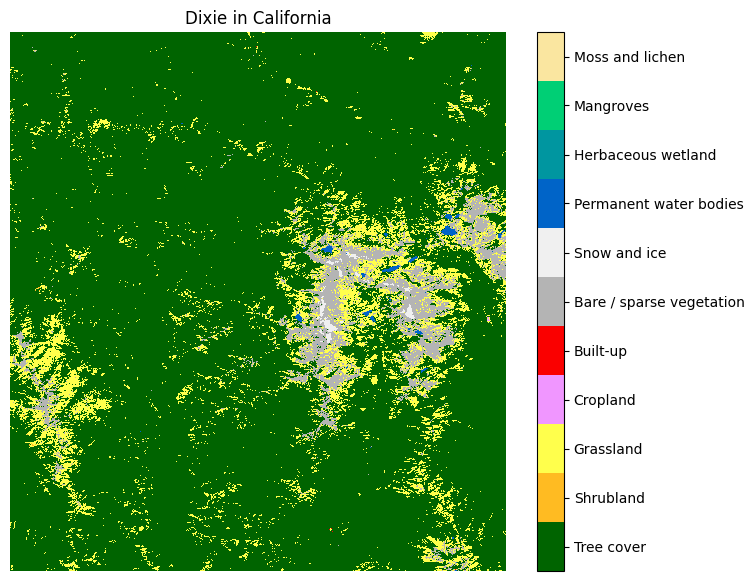

In [ ]:
from matplotlib import cm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 7))
normalizer = matplotlib.colors.Normalize(vmin=0, vmax=255)

map_data.isel(latitude=slice(3000, 6000), longitude=slice(4000, 7000)).plot(
    ax=ax, cmap=cmap, norm=normalizer
)

colorbar = fig.colorbar(
    cm.ScalarMappable(norm=normalizer, cmap=cmap),
    boundaries=boundaries,
    values=values,
    cax=fig.axes[1].axes,
)
colorbar.set_ticks(ticks, labels=tick_labels)

ax.set_axis_off()
ax.set_title("Dixie in California");

Plot the landcover

In [ ]:
range_new = "2021-06-21/2021-06-30"
search = catalog.search(
    intersects=area_of_interest,
    collections=["sentinel-2-l2a"],
    datetime=range_new, #"2021-07-12/2021-08-21",
    query={"eo:cloud_cover": {"lt": 10}}
)
#items = search.get_all_items()
#print(len(items))

# Check how many items were returned
items = search.item_collection()
print(f"Returned {len(items)} Items")

import random
selected_item = random.choice(items)

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table

Returned 3 Items


┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key          ┃ Description                           ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ AOT                │ Aerosol optical thickness (AOT)       │
│ B01                │ Band 1 - Coastal aerosol - 60m        │
│ B02                │ Band 2 - Blue - 10m                   │
│ B03                │ Band 3 - Green - 10m                  │
│ B04                │ Band 4 - Red - 10m                    │
│ B05                │ Band 5 - Vegetation red edge 1 - 20m  │
│ B06                │ Band 6 - Vegetation red edge 2 - 20m  │
│ B07                │ Band 7 - Vegetation red edge 3 - 20m  │
│ B08                │ Band 8 - NIR - 10m                    │
│ B09                │ Band 9 - Water vapor - 60m            │
│ B11                │ Band 11 - SWIR (1.6) - 20m            │
│ B12                │ Band 12 - SWIR (2.2) - 20m            │
│ B8A                │ Band 8A - Vegetation red edge 4 - 20m │
│ SCL                │ Scene classfication map (SCL)         │
│ WVP                │ Water vapour (WVP)                    │
│ visual             │ True color image                      │
│ preview            │ Thumbnail                             │
│ safe-manifest      │ SAFE manifest                         │
│ granule-metadata   │ Granule metadata                      │
│ inspire-metadata   │ INSPIRE metadata                      │
│ product-metadata   │ Product metadata                      │
│ datastrip-metadata │ Datastrip metadata                    │
│ tilejson           │ TileJSON with default rendering       │
│ rendered_preview   │ Rendered preview                      │
└────────────────────┴───────────────────────────────────────┘

In [ ]:
!pip install folium matplotlib mapclassify

In [ ]:
df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].explore(
    column="eo:cloud_cover", style_kwds={"fillOpacity": 0.1}
)

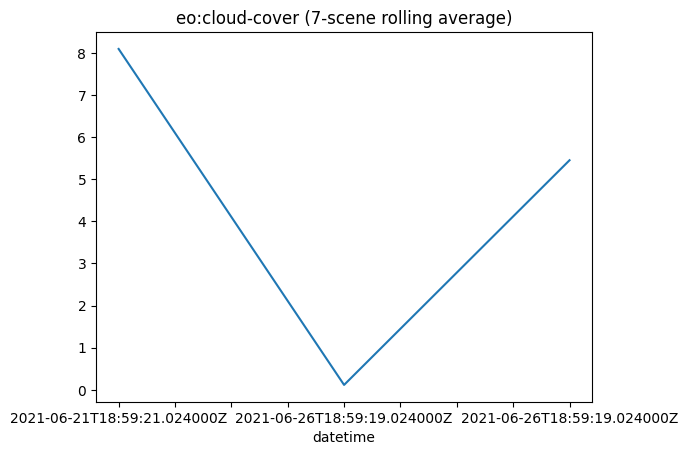

In [ ]:
ts = df.set_index("datetime").sort_index()["eo:cloud_cover"]#.rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

In [ ]:
from pystac.extensions.eo import EOExtension as eo
least_cloudy_item = min(items, key=lambda item: eo.ext(item).cloud_cover)

print(
    f"Choosing {least_cloudy_item.id} from {least_cloudy_item.datetime.date()}"
    f" with {eo.ext(least_cloudy_item).cloud_cover}% cloud cover"
)

Choosing S2B_MSIL2A_20210626T185919_R013_T10TEL_20210627T035058 from 2021-06-26 with 0.115939% cloud cover


In [ ]:
import stackstac
%time stack = stackstac.stack(items, epsg=3857, resolution=100, bounds_latlon=bbox)
# stack

CPU times: user 46.5 ms, sys: 2.32 ms, total: 48.8 ms
Wall time: 80.3 ms


In [ ]:
selected_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20210626T185919_R013_T10TDL_20210627T034915&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [ ]:
least_cloudy_item.assets["rendered_preview"].to_dict()

{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=sentinel-2-l2a&item=S2B_MSIL2A_20210626T185919_R013_T10TEL_20210627T035058&assets=visual&asset_bidx=visual%7C1%2C2%2C3&nodata=0&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [ ]:
display(Image(url=selected_item.assets["rendered_preview"].href, width=500))
display(Image(url=least_cloudy_item.assets["rendered_preview"].href, width=500))

In [ ]:
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

In [ ]:
from IPython.display import Image

Image(url=least_cloudy_item.assets["rendered_preview"].href, width=500)

In [ ]:
!pip install torchgeo

In [ ]:
items

https://sentinel2l2a01.blob.core.windows.net/sentinel2-l2/10/T/EL/2021/06/26/S2B_MSIL2A_20210626T185919_N0300_R013_T10TEL_20210627T035058.SAFE/GRANULE/L2A_T10TEL_A022490_20210626T190811/IMG_DATA/R10m/T10TEL_20210626T185919_TCI_10m.tif?st=2024-01-14T19%3A42%3A04Z&se=2024-01-15T20%3A27%3A04Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2024-01-15T15%3A09%3A09Z&ske=2024-01-22T15%3A09%3A09Z&sks=b&skv=2021-06-08&sig=wPOPJqQ8D91l3gsLToXJDPS3/wKo5FXrL9Egs1UAb0w%3D

In [ ]:
import os
import tempfile
from urllib.parse import urlparse

import matplotlib.pyplot as plt
import planetary_computer
import pystac
import torch
from torch.utils.data import DataLoader
from torchgeo.datasets import RasterDataset, stack_samples, unbind_samples
from torchgeo.datasets.utils import download_url
from torchgeo.samplers import RandomGeoSampler

root = os.path.join(tempfile.gettempdir(), "sentinel")

In [ ]:
# Manual download

# for features in items:
#   for asset_key in features.assets:
#       asset = features.assets[asset_key]
#       # print('{}: {} ({})'.format(asset_key, asset.href, asset.media_type))
#       for band in ["B02", "B03", "B04", "B08"]:
#         #print('{}: {} ({})'.format(asset_key[band], asset.href[band], asset.media_type[band]))
#         asset_href = features.assets[band].href
#         filename = urlparse(asset_href).path.split("/")[-1]
#         # print(filename)
#         download_url(asset_href, root, filename)


In [ ]:
#sorted(os.listdir(root))

In [ ]:
!du -hs {root}


du: cannot access '/tmp/sentinel': No such file or directory


Otra forma: https://stac-asset.readthedocs.io/en/latest/index.html

In [ ]:
!pip install stac-asset

In [ ]:
import stac_asset
root2 = os.path.join(tempfile.gettempdir(), "sentinel")
await stac_asset.download_item_collection(items, root2)

In [ ]:
!du -hs {root2}

5.0G	/tmp/sentinel


In [ ]:
sorted(os.listdir(root2))

['S2A_MSIL2A_20210621T185921_R013_T10TEL_20210624T184335',
 'S2B_MSIL2A_20210626T185919_R013_T10TDL_20210627T034915',
 'S2B_MSIL2A_20210626T185919_R013_T10TEL_20210627T035058',
 'item-collection.json']

In [ ]:
!ls -al {root2}

total 84
drwxr-xr-x 5 root root  4096 Jan 16 16:51 .
drwxrwxrwt 1 root root  4096 Jan 16 16:49 ..
-rw-r--r-- 1 root root 64499 Jan 16 16:51 item-collection.json
drwxr-xr-x 2 root root  4096 Jan 16 16:49 S2A_MSIL2A_20210621T185921_R013_T10TEL_20210624T184335
drwxr-xr-x 2 root root  4096 Jan 16 16:49 S2B_MSIL2A_20210626T185919_R013_T10TDL_20210627T034915
drwxr-xr-x 2 root root  4096 Jan 16 16:49 S2B_MSIL2A_20210626T185919_R013_T10TEL_20210627T035058


In [ ]:
!ls -al {root2}/S2A_MSIL2A_20210621T185921_R013_T10TEL_20210624T184335

total 1732828
drwxr-xr-x 2 root root      4096 Jan 16 16:49 .
drwxr-xr-x 5 root root      4096 Jan 16 16:51 ..
-rw-r--r-- 1 root root     14812 Jan 16 16:49 INSPIRE.xml
-rw-r--r-- 1 root root     69638 Jan 16 16:49 manifest.safe
-rw-r--r-- 1 root root  15082144 Jan 16 16:50 MTD_DS.xml
-rw-r--r-- 1 root root     51154 Jan 16 16:49 MTD_MSIL2A.xml
-rw-r--r-- 1 root root    552983 Jan 16 16:49 MTD_TL.xml
-rw-r--r-- 1 root root   2967296 Jan 16 16:50 preview.png
-rw-r--r-- 1 root root  10128025 Jan 16 16:50 T10TEL_20210621T185921_AOT_10m.tif
-rw-r--r-- 1 root root   6226127 Jan 16 16:50 T10TEL_20210621T185921_B01_60m.tif
-rw-r--r-- 1 root root 223079084 Jan 16 16:51 T10TEL_20210621T185921_B02_10m.tif
-rw-r--r-- 1 root root 228884511 Jan 16 16:51 T10TEL_20210621T185921_B03_10m.tif
-rw-r--r-- 1 root root 232512849 Jan 16 16:51 T10TEL_20210621T185921_B04_10m.tif
-rw-r--r-- 1 root root  59872983 Jan 16 16:50 T10TEL_20210621T185921_B05_20m.tif
-rw-r--r-- 1 root root  61554091 Jan 16 16:50 T10TEL

Sentinel2 Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=399960.0, maxx=609780.0, miny=4490220.0, maxy=4600020.0, mint=1624301961.0, maxt=1624733959.999999)
    size: 3


TypeError: Invalid shape (4, 4096, 4096) for image data

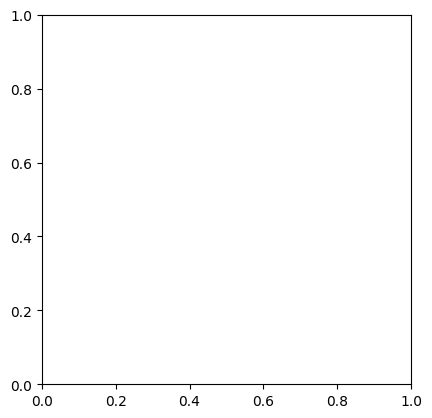

In [ ]:
# https://torchgeo.readthedocs.io/en/stable/api/datasets.html#torchgeo.datasets.Sentinel2

from torchgeo.datasets import RasterDataset, stack_samples, unbind_samples
class Sentinel2(RasterDataset):
    filename_glob = "T*_B02_10m.tif"
    filename_regex = r"^.{6}_(?P<date>\d{8}T\d{6})_(?P<band>B0[\d])"
    date_format = "%Y%m%dT%H%M%S"
    is_image = True
    separate_files = True
    all_bands = ["B02", "B03", "B04", "B08"]
    rgb_bands = ["B04", "B03", "B02"]

    def plot(self, sample):
        # Find the correct band index order
        rgb_indices = []
        for band in self.rgb_bands:
            rgb_indices.append(self.all_bands.index(band))

        # Reorder and rescale the image
        image = sample["image"]
        image = torch.clamp(image / 10000, min=0, max=1).numpy()

        # Plot the image
        fig, ax = plt.subplots()
        ax.imshow(image)

        return fig

dataset = Sentinel2(root2)
print(dataset)

torch.manual_seed(1)

sampler = RandomGeoSampler(dataset, size=4096, length=3)
dataloader = DataLoader(dataset, sampler=sampler, collate_fn=stack_samples)

for batch in dataloader:
    sample = unbind_samples(batch)[0]
    dataset.plot(sample)
    plt.axis("off")
    plt.show()

---
https://leafmap.org/notebooks/03_cog_stac/

In [ ]:
!pip install leafmap

In [ ]:
import leafmap

m = leafmap.Map()
m.add_stac_layer(
    collection="sentinel-2-l2a",
    item="S2A_MSIL2A_20210628T184921_R113_T10TFL_20210630T063015",
    assets="visual",
    #rescale="0,12000",

)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

MODIS

In [ ]:
area_of_interest

{'type': 'Point', 'coordinates': [-122.942, 40.731]}

In [ ]:
search = catalog.search(
    intersects=area_of_interest,
    collections=["modis-14A2-061"],
    # datetime="2021-07-12/2021-08-21"
    datetime="2021-07-28"
).item_collection()

In [ ]:
data = odc.stac.load(
    # items.values(),
    search,
    crs="EPSG:3857",
    bbox=bbox,
    bands="FireMask",
    resolution=1000,
)
data = data.where(data < 10, drop=True)

In [ ]:
data["FireMask"]

<xarray.DataArray 'FireMask' (time: 1, y: 207, x: 157)>
array([[[5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.],
        ...,
        [5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.],
        [5., 5., 5., ..., 5., 5., 5.]]], dtype=float32)
Coordinates:
  * y            (y) float64 5.076e+06 5.076e+06 ... 4.872e+06 4.87e+06
  * x            (x) float64 -1.376e+07 -1.376e+07 ... -1.361e+07 -1.361e+07
    spatial_ref  int32 3857
  * time         (time) datetime64[ns] 2021-07-28

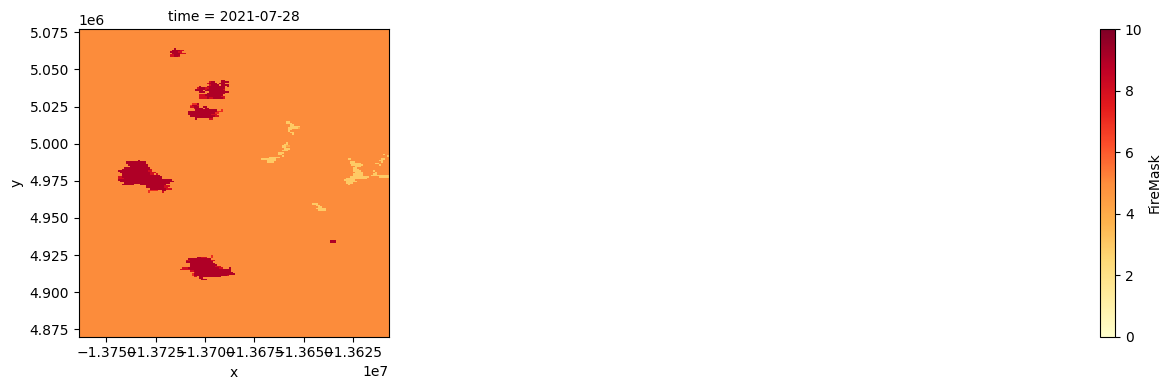

In [ ]:
data["FireMask"].plot.imshow(
    cmap="YlOrRd", col="time", vmin=0, vmax=10, col_wrap=3, size=4
)

In [ ]:
search[0]

<Item id=MYD14A2.A2021209.h08v04.061.2021218015513>

In [ ]:
search[0].assets["rendered_preview"].href

'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=modis-14A2-061&item=MYD14A2.A2021209.h08v04.061.2021218015513&assets=FireMask&tile_format=png&colormap_name=modis-14A1%7CA2&format=png'

In [ ]:
#stacmap.explore(search, extensions=["view", "eo"])

In [ ]:
root3 = os.path.join(tempfile.gettempdir(), "modis")
await stac_asset.download_item_collection(search, root3)

In [ ]:
root3

'/tmp/modis'

In [ ]:
!ls -al {root3}

total 32
drwxr-xr-x 4 root root  4096 Jan 16 16:53 .
drwxrwxrwt 1 root root  4096 Jan 16 16:53 ..
-rw-r--r-- 1 root root 14359 Jan 16 16:53 item-collection.json
drwxr-xr-x 2 root root  4096 Jan 16 16:53 MOD14A2.A2021209.h08v04.061.2021218013405
drwxr-xr-x 2 root root  4096 Jan 16 16:53 MYD14A2.A2021209.h08v04.061.2021218015513


In [ ]:
Image(url=search[0].assets["rendered_preview"].href, width=500)

In [ ]:
import leafmap

m = leafmap.Map()
m.add_stac_layer(
    collection="modis-14A2-061",
    item="MYD14A2.A2021209.h08v04.061.2021218015513",
    assets="FireMask",
    #rescale="0,12000",

)
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
# https://torchgeo.readthedocs.io/en/stable/api/datasets.html#torchgeo.datasets.Sentinel2
# https://medium.com/@ns_geoai/custom-geospatial-dataloader-with-pytorch-and-rasterio-4f6d896ef441

from torchgeo.datasets import RasterDataset, stack_samples, unbind_samples
class Modis(RasterDataset):
  # MOD14A2.A2021209.h08v04.061.2021218013405
    # filename_glob = "T*_B02_10m.tif"
    filename_glob = "MOD14A2*"
    filename_regex = r"^MOD14A2.{21}(?P<date>\d{13})"
    # 2021218013405
    date_format = "%Y%m%d%H%M%S"
    is_image = True
    separate_files = True
    # all_bands = ["B02", "B03", "B04", "B08"]
    # rgb_bands = ["B04", "B03", "B02"]

    def plot(self, sample):
        # Find the correct band index order
        rgb_indices = []
        #for band in self.rgb_bands:
        #    rgb_indices.append(self.all_bands.index(band))

        # Reorder and rescale the image
        # image = sample["image"][rgb_indices].permute(1, 2, 0)
        image = sample["image"]
        image = torch.clamp(image / 10000, min=0, max=1).numpy()

        # Plot the image
        fig, ax = plt.subplots()
        ax.imshow(image)

        return fig

modis_dataset = Modis(root3)
print(modis_dataset)

torch.manual_seed(1)

sampler = RandomGeoSampler(modis_dataset, size=4096, length=1)
dataloader = DataLoader(modis_dataset, sampler=sampler, collate_fn=stack_samples)

print(dataloader.sampler)

for batch in dataloader:
  print(batch)
    # sample = unbind_samples(batch)[0]
    # sample = batch[0]
    # dataset.plot(sample)
    # plt.axis("off")
    # plt.show()

Modis Dataset
    type: GeoDataset
    bbox: BoundingBox(minx=-11119505.196667, maxx=-10007554.6770005, miny=4447802.078666499, maxy=5559752.598333, mint=1613612045.0, maxt=1613612045.999999)
    size: 2


RuntimeError: cannot sample n_sample > prob_dist.size(-1) samples without replacement

https://regionmask.readthedocs.io/en/v0.5.0/index.html

Create masks from regions

In [ ]:
!pip install regionmask

In [ ]:
import regionmask
# regionmask.defined_regions.giorgi.mask(data)

# TODO: Recortar firemask o sobreponer a landcover

Plot map

In [ ]:
!pip install stacmap

In [ ]:
items

In [ ]:
import stacmap
stacmap.explore(items)

In [ ]:

#stacmap.explore(items, prop="eo:cloud_cover")
stacmap.explore(search)

To try:


*   https://github.com/cloudsen12/easystac
*   https://github.com/calebrob6/segment-anything?tab=readme-ov-file
*   https://zen3geo.readthedocs.io/en/latest/walkthrough.html
*   https://techcommunity.microsoft.com/t5/azure-synapse-analytics-blog/introduce-a-notebook-gallery-image-to-process-geospatial-data/ba-p/3582865
*   https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/



In [ ]:
!pip install zen3geo

In [ ]:
# Geospatial libraries
import pystac
import planetary_computer
import rioxarray
# Deep Learning libraries
import torch
import torchdata
import zen3geo

In [ ]:
print(f"pystac version: {pystac.__version__}")
print(f"planetary-computer version: {planetary_computer.__version__}")
print(f"torch version: {torch.__version__}")

print(f"torchdata version: {torchdata.__version__}")
print(f"zen3geo version: {zen3geo.__version__}")
rioxarray.show_versions()

pystac version: 1.9.0
planetary-computer version: 1.0.0
torch version: 2.1.0+cu121
torchdata version: 0.7.0
zen3geo version: 0.6.2
rioxarray (0.15.0) deps:
  rasterio: 1.3.9
    xarray: 2023.7.0
      GDAL: 3.6.4
      GEOS: 3.11.1
      PROJ: 9.0.1
 PROJ DATA: /usr/local/lib/python3.10/dist-packages/rasterio/proj_data
 GDAL DATA: /usr/local/lib/python3.10/dist-packages/rasterio/gdal_data

Other python deps:
     scipy: 1.11.4
    pyproj: 3.6.1

System:
    python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
executable: /usr/bin/python3
   machine: Linux-6.1.58+-x86_64-with-glibc2.35


In [ ]:
url: str = least_cloudy_item.assets["visual"].href
da = rioxarray.open_rasterio(filename=url)
da

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
  * y            (y) float64 4.6e+06 4.6e+06 4.6e+06 ... 4.49e+06 4.49e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
dp = torchdata.datapipes.iter.IterableWrapper(iterable=[url])
dp

IterableWrapperIterDataPipe

In [ ]:
# Using functional form (recommended)
dp_rioxarray = dp.read_from_rioxarray()
dp_rioxarray

RioXarrayReaderIterDataPipe

In [ ]:
dp_rioxarray_zoom3 = dp.read_from_rioxarray(overview_level=3)
dp_rioxarray_zoom3

RioXarrayReaderIterDataPipe

In [ ]:
it = iter(dp_rioxarray_zoom3)
dataarray = next(it)
dataarray

StreamWrapper<<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 5.001e+05 5.002e+05 ... 6.095e+05 6.097e+05
  * y            (y) float64 4.6e+06 4.6e+06 4.6e+06 ... 4.49e+06 4.49e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0>

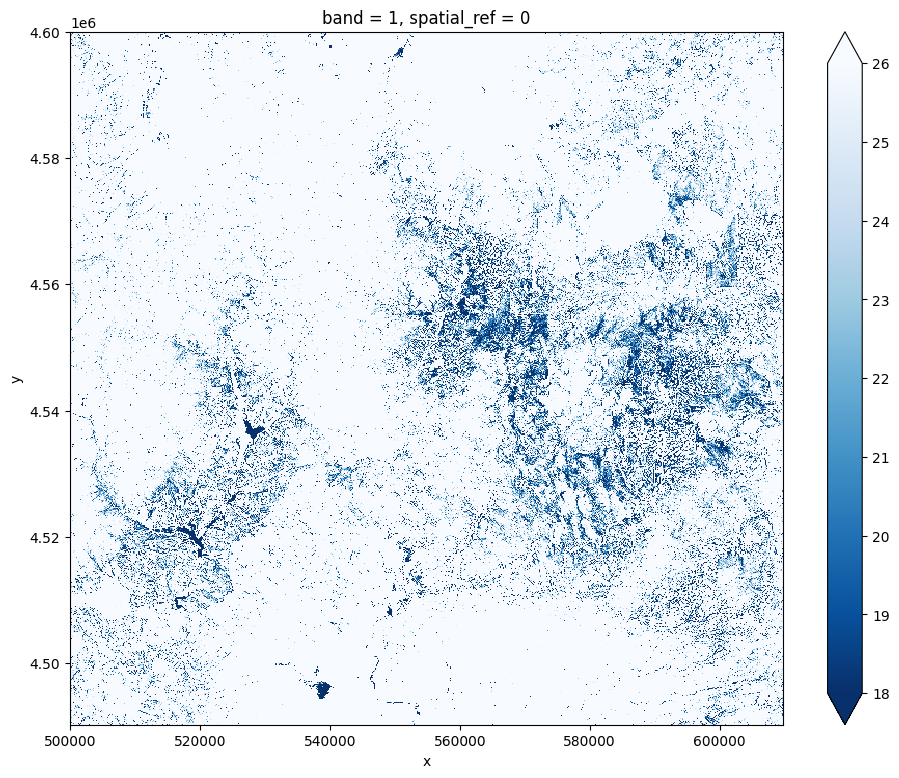

In [ ]:
# da_clip = dataarray.rio.clip_box(minx=371483, miny=190459, maxx=409684, maxy=229474)
# da_clip.isel(band=0).plot.imshow(figsize=(11.5, 9), cmap="Blues_r", vmin=18, vmax=26)

dataarray.isel(band=0).plot.imshow(figsize=(11.5, 9), cmap="Blues_r", vmin=18, vmax=26)

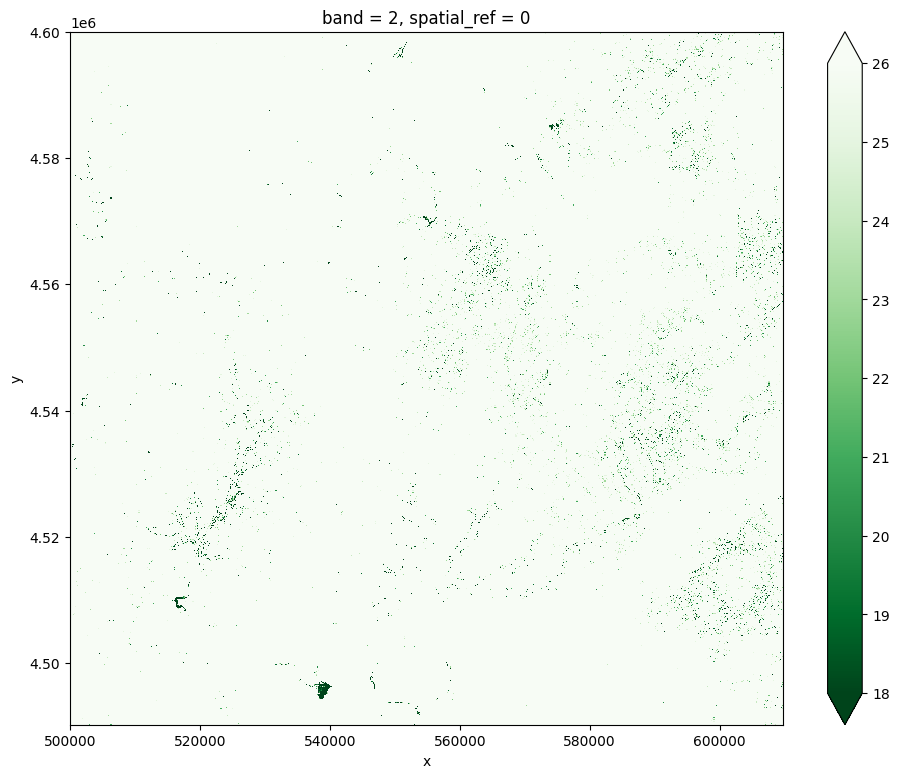

In [ ]:
dataarray.isel(band=1).plot.imshow(figsize=(11.5, 9), cmap="Greens_r", vmin=18, vmax=26)

In [ ]:
def fn(da):
    return torch.as_tensor(da.data)

dp_tensor = dp_rioxarray_zoom3.map(fn=fn)
dp_tensor

MapperIterDataPipe

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset=dp_tensor)
for batch in dataloader:
    tensor = batch
    print(tensor)

tensor([[[[ 53,  41,  17,  ...,  38,  34,  18],
          [ 29,  52,  19,  ...,  32,  39,  79],
          [ 33,  21,  43,  ...,  25,  65,  81],
          ...,
          [ 78,  20,  87,  ...,  61,  64,  57],
          [ 35,  49,  83,  ...,  26, 103, 104],
          [ 28,  70,  31,  ...,  29, 106,  55]],

         [[ 61,  59,  35,  ...,  37,  34,  23],
          [ 48,  58,  44,  ...,  33,  37,  66],
          [ 54,  43,  58,  ...,  28,  55,  67],
          ...,
          [ 73,  33,  75,  ...,  51,  56,  51],
          [ 47,  54,  76,  ...,  30,  85,  84],
          [ 42,  61,  45,  ...,  33,  86,  47]],

         [[ 43,  38,  23,  ...,  29,  27,  18],
          [ 29,  43,  27,  ...,  25,  30,  56],
          [ 35,  26,  38,  ...,  22,  44,  59],
          ...,
          [ 57,  22,  58,  ...,  38,  44,  37],
          [ 34,  41,  58,  ...,  22,  65,  64],
          [ 30,  46,  30,  ...,  23,  68,  35]]]], dtype=torch.uint8)
